### Tommaso Armadillo matr. 885460

# <span style="color:red"> Numerical Exercise 11</span>

## <span style="color:blue"> Exercise 11.1</span>
#### Scope
The scope of the exercise was to make practise in the use of NN. To do this we have to explore how the linear regression example depend on the number of epochs,  $N_{epochs}$, the number of data points  $N_{train}$ and on the noise $\sigma$.

First we generate some random point disposed on a straight line that we will use for training and then validating the NN.

In [83]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [84]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0. # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

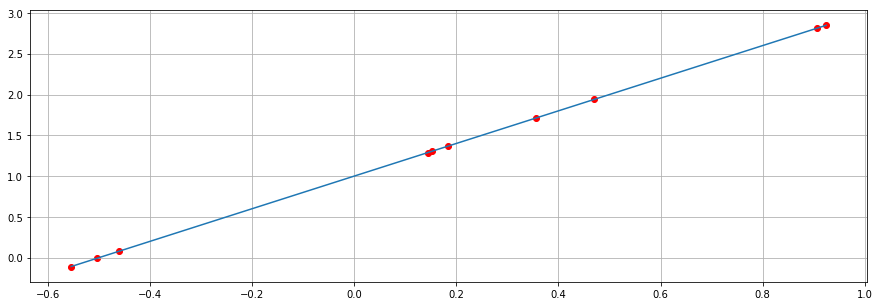

In [85]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

This are the validating points we have generated.

Now we start setting the NN:

In [86]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_200 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We can use only one layer because we want to reproduce a linear function.

In [87]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Train on 100 samples, validate on 10 samples
Epoch 1/30
100/100 [==============================] - 1s 8ms/sample - loss: 3.2083 - mean_squared_error: 3.2083 - val_loss: 3.7846 - val_mean_squared_error: 3.7846
Epoch 2/30
100/100 [==============================] - 0s 285us/sample - loss: 2.9877 - mean_squared_error: 2.9877 - val_loss: 3.4276 - val_mean_squared_error: 3.4276
Epoch 3/30
100/100 [==============================] - 0s 225us/sample - loss: 2.7417 - mean_squared_error: 2.7417 - val_loss: 3.1769 - val_mean_squared_error: 3.1769
Epoch 4/30
100/100 [==============================] - 0s 265us/sample - loss: 2.5646 - mean_squared_error: 2.5646 - val_loss: 2.9042 - val_mean_squared_error: 2.9042
Epoch 5/30
100/100 [==============================] - 0s 268us/sample - loss: 2.3747 - mean_squared_error: 2.3747 - val_loss: 2.7334 - val_mean_squared_error: 2.7334
Epoch 6/30
100/100 [==============================] - 0s 298us/sample - loss: 2.2447 - mean_squared_error: 2.2447 - val_loss: 2

In [88]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 550us/sample - loss: 0.5426 - mean_squared_error: 0.5426

Test loss: 0.5425658226013184
Test accuracy: 0.5425658


In [89]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 379us/sample - loss: 0.5426 - mean_squared_error: 0.5426

Test loss: 0.5425658226013184
Test accuracy: 0.5425658


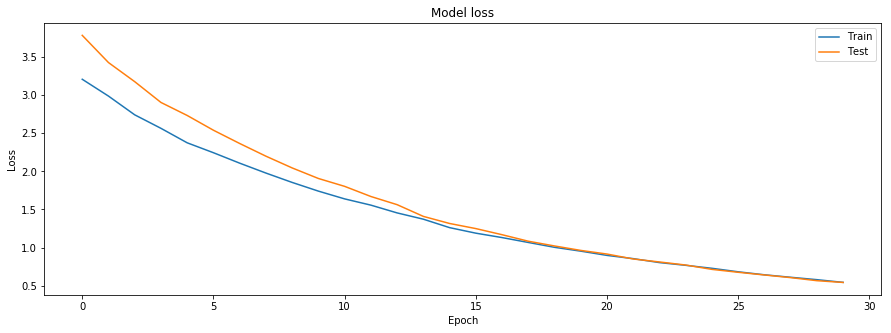

In [90]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

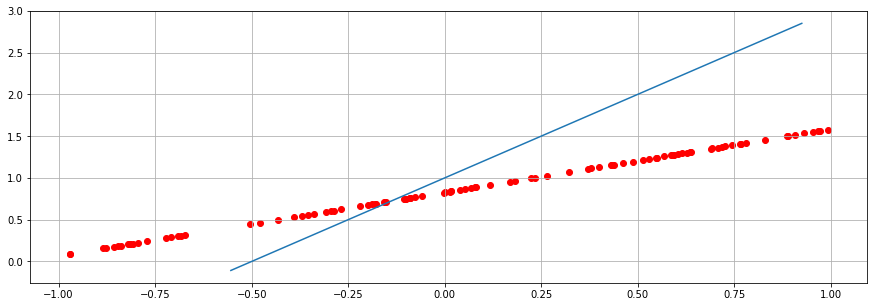

In [91]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Using only 30 generations with a batch size of 32 we don't get good results, in fact the points that our NN predicts (red points above) doesn't dispose in the correct line. We could increase the number of epochs.

In [92]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=70,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)


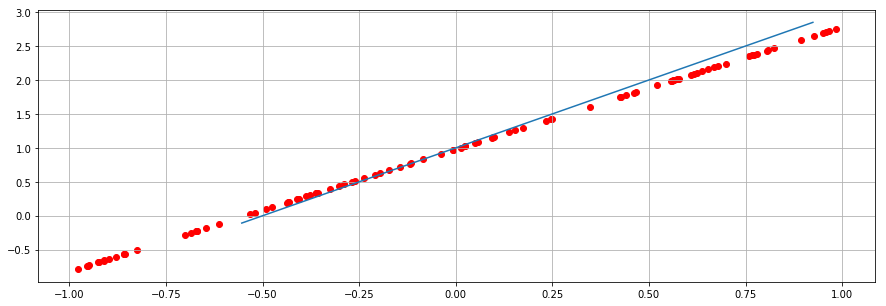

In [93]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

With 70 more epochs (100 in total) the points we predict are more likely to come from the blue line. In this case the training is very fast (some seconds in total) so we can also train the NN for more epochs, for example other 50.

In [94]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

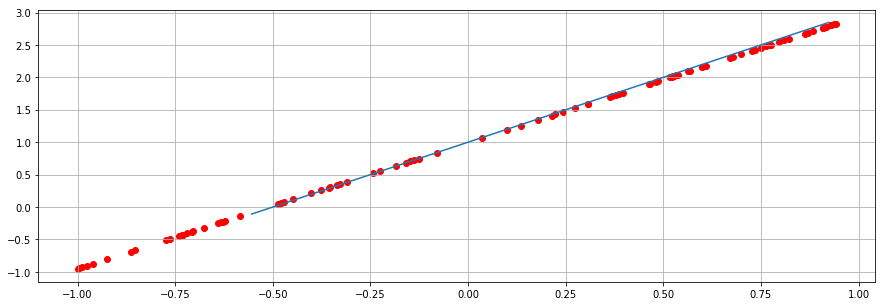

In [95]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

And we see that the result get better and better and this is confirmed from the fact that the loss and the accuracy decrase.

10/10 [==============================] - 0s 407us/sample - loss: 9.1335e-04 - mean_squared_error: 9.1335e-04

Test loss: 0.0009133504936471581
Test accuracy: 0.0009133505


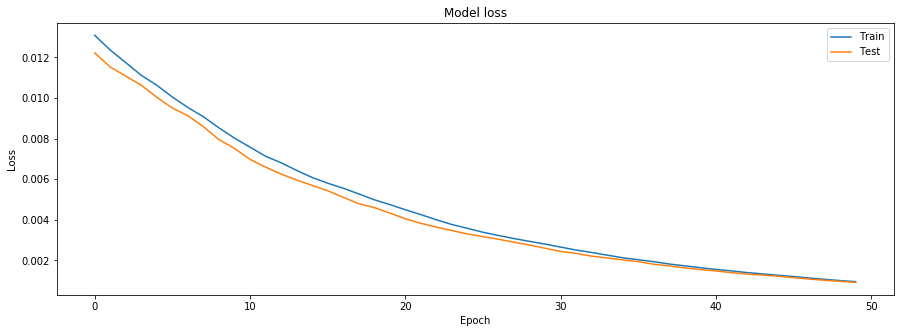

In [96]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

#### Increase the number of points

Now we are going to increase the number of points that we use for training and testing the NN. We'll keep the number of epochs fixed to 30. We will use 500 points for training and 50 for validating.

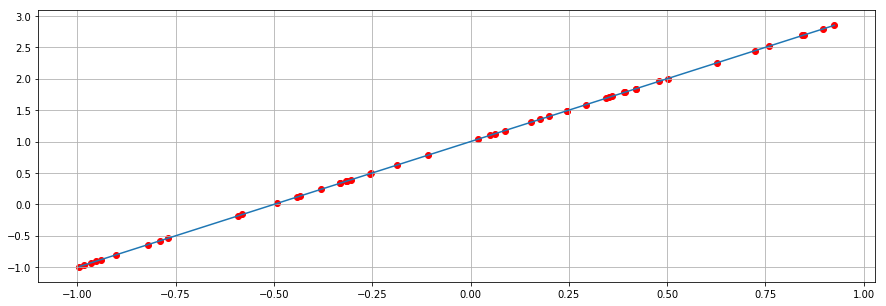

In [97]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0. # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

We reset the NN and make the training for 30 epochs with 32 batch size.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_202 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


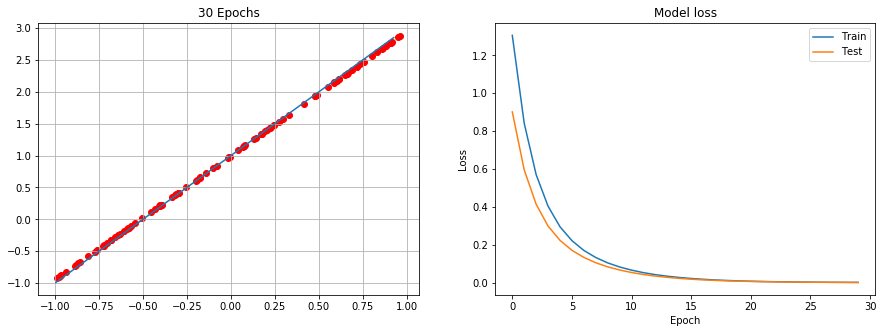

In [99]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
plt.show()

After only 30 epochs we got a result which approximate very well the blue line.

The loss is $3-5$ times bigger than the one we got in the previous case with only 100 data for training, but I think it's remarkable that we used only 30 epochs rather than 150. This reduction in the number of epochs, in much more complicated problems, will lead to a great time save.

#### Adding noise

Let's now see what happen if the points for training and validating does not come from a perfect line. We will use 500 points for training because we saw that this lead to an improve in the training time.

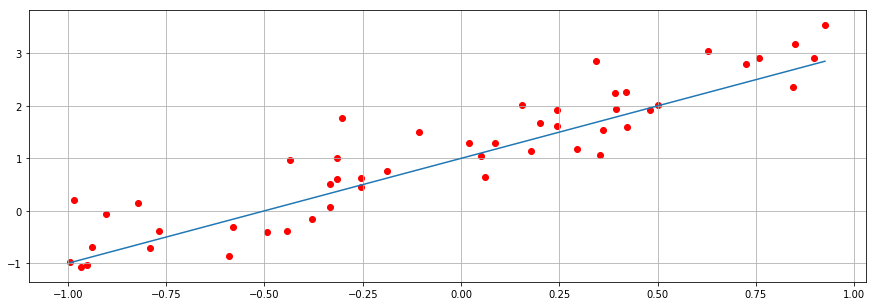

In [100]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_203 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


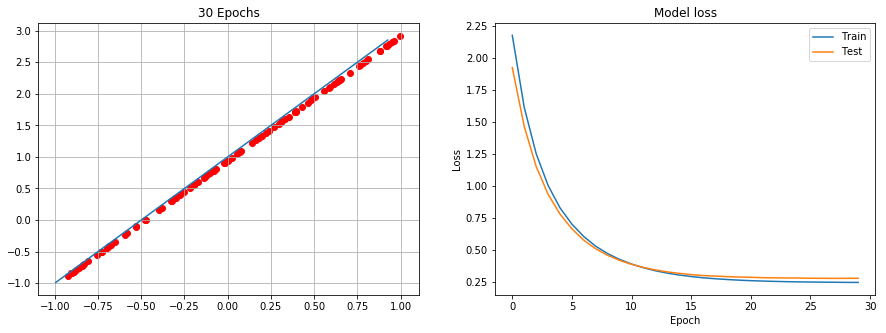

In [101]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
plt.show()

The predicted points disposed in a straight line, even if there is noise, because this is the only possibility for how we built the NN. After only 30 epochs we get a pretty good results considering that the data this time contain noise. As we expect if we increase the noise, in the same number of epochs we get worse predictions.

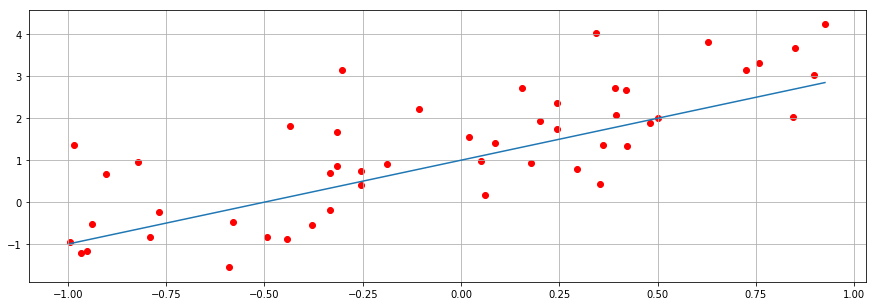

In [102]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

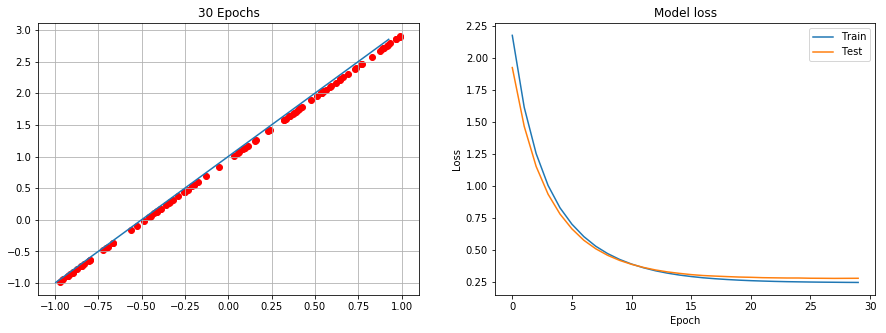

In [103]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
plt.show()

Even if the points dispose in a line which seems to reproduce the line $y=2x+1$ the prediction is worse than the case with $\sigma=0.5$ as we can see from the test loss and the test accuracy.

#### Conclusion

From this first experience with NN we understood that increasing the number of epochs is worth in those problems in which the training time for each epoch is short, so in those cases where the number of parametres we have to optimize is resticted, or when we cannot generate as many data as we want. Otherwise it is better to increase the number of training and validation data.

## <span style="color:blue"> Exercise 11.2</span>
#### Scope
We have to build and train a NN to fit the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

We have also to explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function

This is a more complicated problems so we used more points to train (2000) and validate (200)

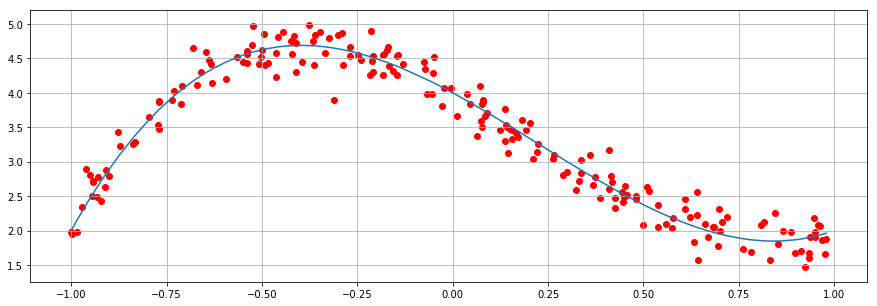

In [104]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 2000)
x_valid = np.random.uniform(-1, 1, 200)
x_valid.sort()
y_target = 4 - 3 * x_valid - 2 * x_valid**2 + 3 * x_valid**3 # ideal (target) 

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(4 - 3 * x_train - 2 * x_train**2 + 3 * x_train**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4 - 3 * x_valid - 2 * x_valid**2 + 3 * x_valid**3, sigma) 

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_205 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_206 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_207 (Dense)            (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


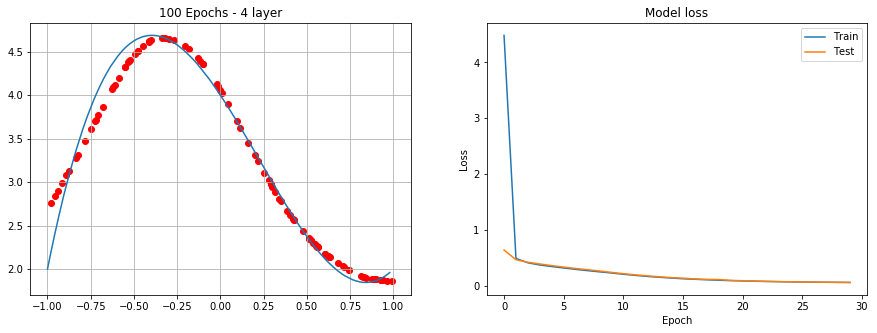

In [105]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='elu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=64, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('100 Epochs - 4 layer')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
plt.show()

Using three hidden layers we get pretty good approximation of f(x). If we try to predict values for f(x) outside the interval $\big[-1;1\big]$ the NN fails. This is because we trained it on some points but we didn't give it any method to understand how it should behave for other points.

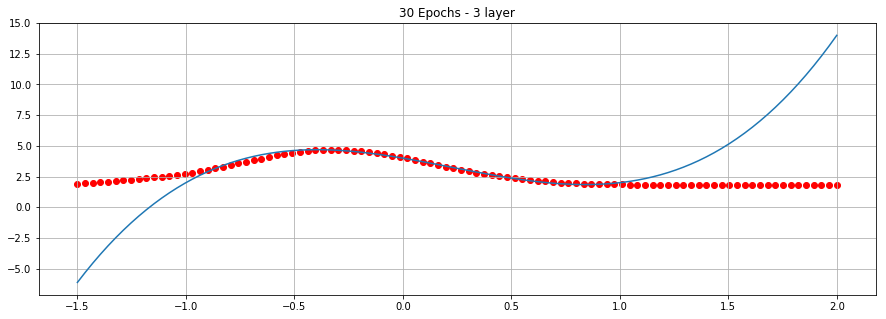

In [106]:
x_predicted = np.linspace(-1.5, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_predicted, 4.-3*x_predicted-2.*x_predicted**2+3.*x_predicted**3)
plt.grid(True)
plt.title('30 Epochs - 3 layer')
plt.show()

We can try to see what happen if we use only one layer but we use more neurons:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_210 (Dense)            (None, 100)               200       
_________________________________________________________________
dense_211 (Dense)            (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


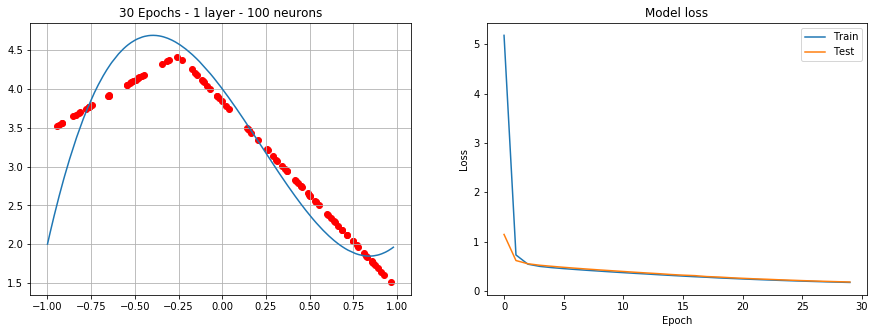

In [108]:
model = tf.keras.Sequential()
model.add(Dense(100, input_shape=(1,), activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=64, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs - 1 layer - 100 neurons')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
plt.show()

We get a really bad approximation of f(x) using the same number of epochs. To improve it we could train the NN for more epochs or increase the number of neurons. Let's explore the second hypothesis

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 1000)              2000      
_________________________________________________________________
dense_213 (Dense)            (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


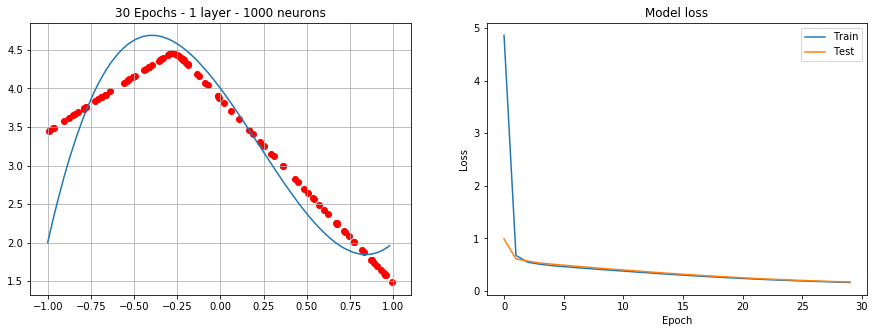

In [109]:
model = tf.keras.Sequential()
model.add(Dense(1000, input_shape=(1,), activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=64, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs - 1 layer - 1000 neurons')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
plt.show()

#### Activation function

We used a 'relu' activation function because it gives the best results. For example if we use a 'tanh' activation function: 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_236 (Dense)            (None, 1000)              2000      
_________________________________________________________________
dense_237 (Dense)            (None, 1)                 1001      
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________


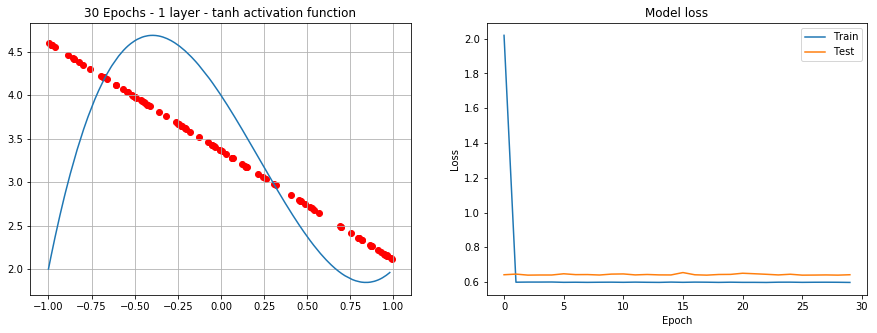

In [115]:
model = tf.keras.Sequential()
model.add(Dense(1000, input_shape=(1,), activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs - 1 layer - tanh activation function')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
plt.show()

We don't get a good result. If we use more layer we have the possibility to use more activation function at the same time:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_216 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_217 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_218 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_219 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_220 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_221 (Dense)            (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


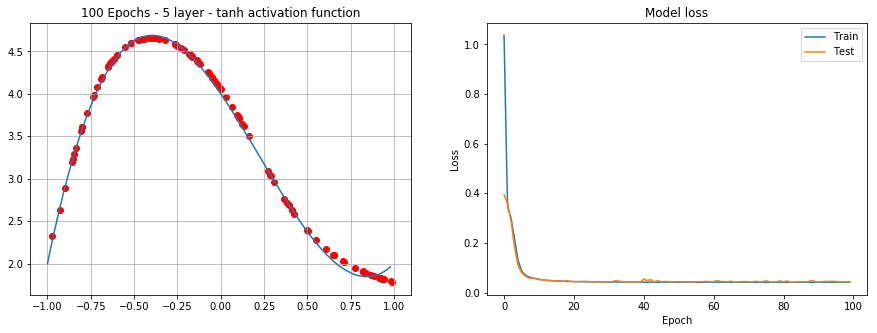

In [111]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose =0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('100 Epochs - 5 layer - tanh activation function')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
plt.show()

We see that using only 30 epochs and 5 layer with 10 neurons in each one with a tanh activation function, we get pretty good prediction. If x is near 1 the red points get more far away from the blue function, this is due to the fact that $f(x)$ has a minimum and then start increasing so we would need more points or more epochs to train properly the NN. 

#### Cost function

We can use different cost function rather than MSE, like for example mean absolute error:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_222 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_223 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_224 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_225 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_226 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_227 (Dense)            (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


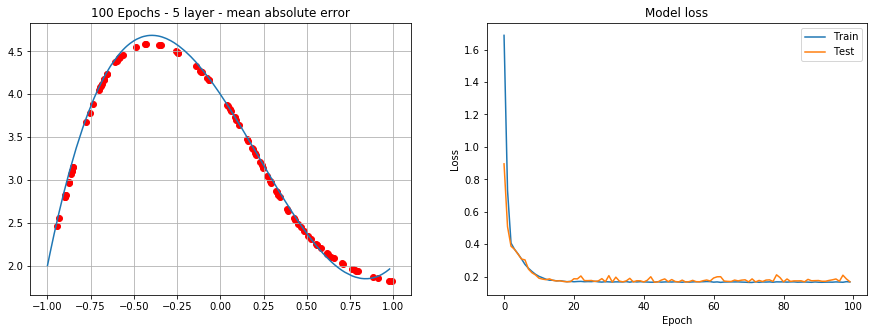

In [112]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mae', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose =0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('100 Epochs - 5 layer - mean absolute error')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
plt.show()

The prediction is not so good as the mean square error. We could use other cost function like mean absolute percentage error or mean absolute logarithm error but they don't give good results. Other cost function like categorical cross entropy are not suitable for this kind of problems, but for catalogation problems.

#### Optimizer

We can use other optimizer than the stocastich gradient descent, like for example gradient descent, or RMSprop.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_229 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_230 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_231 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_232 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


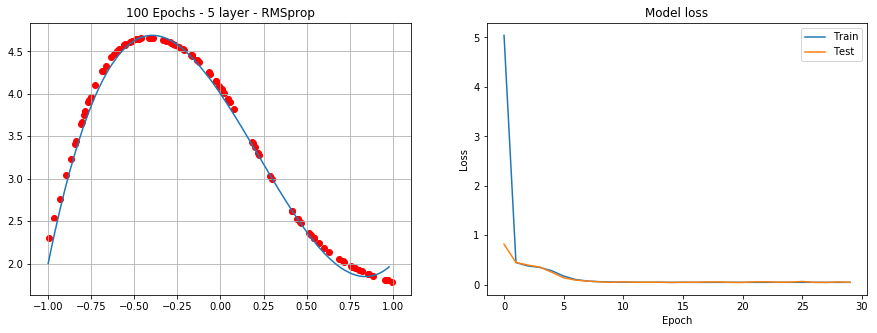

In [113]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='RMSprop', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose =0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('100 Epochs - 5 layer - RMSprop')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
plt.show()

Predicted values and error look very good except near 1.

#### Comments
To summarize everything we found out that it is quicker to train a NN which contains many layer than one that contains only one layer with many neurons. 
The activation function depends on the particoular problem we are solving in this case the best one is tanh.
The best cost function for our problem is MSE, because is a fit problem, other function may be better in other problems like catalogation ones.
Finally the optimizer seems not to play an important role, the only difference between them is that some require more epochs to optimize the parametres.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

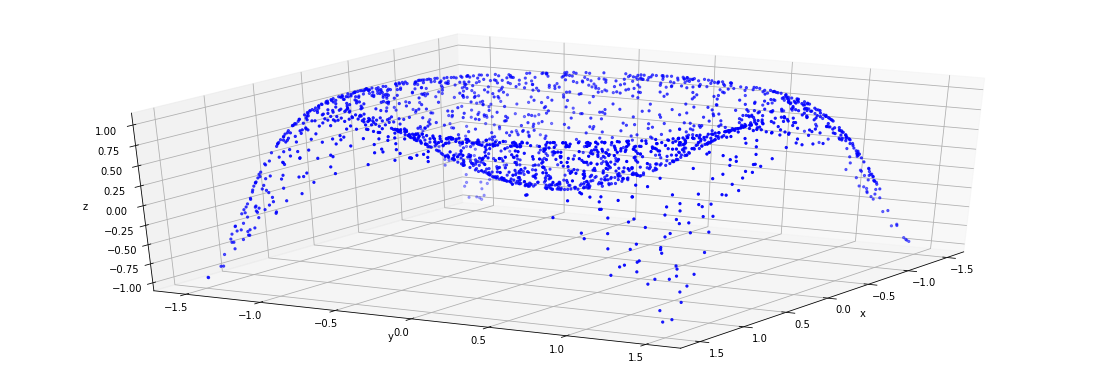

In [145]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.c_[np.random.uniform(-1.5, 1.5, 20000),np.random.uniform(-1.5, 1.5, 20000)]
x_valid = np.c_[np.random.uniform(-1.5, 1.5, 2000),np.random.uniform(-1.5, 1.5, 2000)]

y_target = np.sin(x_valid[:,0]**2  + x_valid[:,1]**2)

sigma = 0.2 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(np.sin(x_train[:,0]**2  + x_train[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(np.sin(x_valid[:,0]**2  + x_valid[:,1]**2), sigma)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_valid[:,0], x_valid[:,1], y_target, marker='.', color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 30)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_298 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_299 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_300 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_301 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_302 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_303 (Dense)            (None, 1)                 11        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


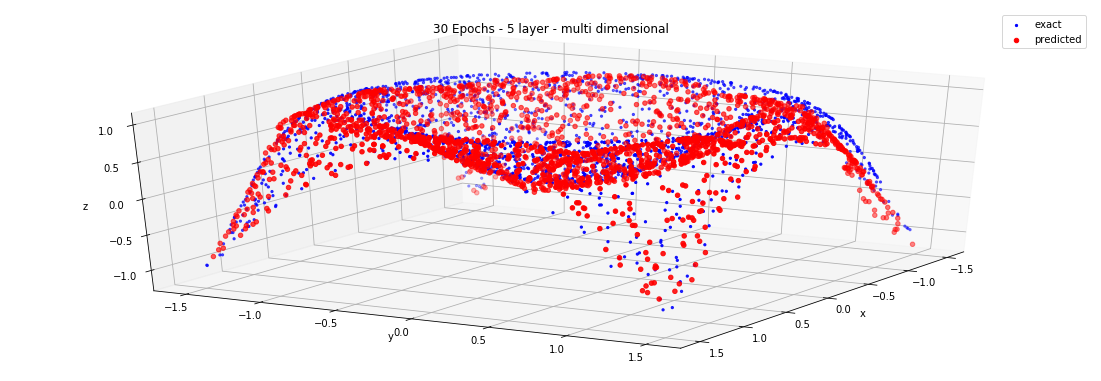

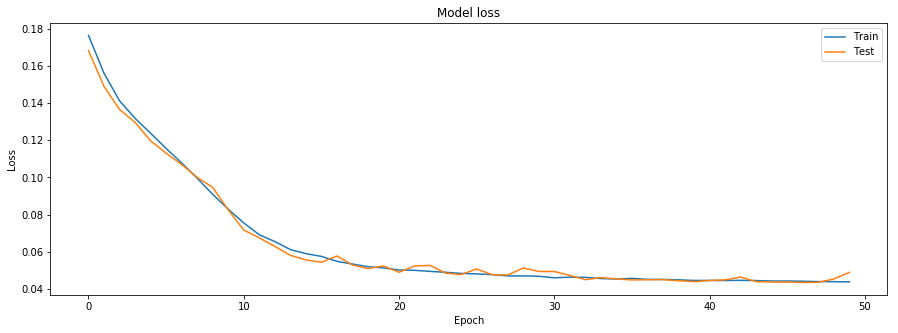

In [154]:
model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(2,), activation='relu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose =0)

plt.rcParams['figure.figsize'] = [15, 5]
fig = plt.figure()
ax = Axes3D(fig)

ax = Axes3D(fig)
ax.scatter(x_valid[:,0], x_valid[:,1], y_target, marker='.', color='blue', label='exact')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 30)
x_predicted = np.c_[np.random.uniform(-1.5, 1.5, 2000),np.random.uniform(-1.5, 1.5, 2000)]
y_predicted = model.predict(x_predicted)
ax.scatter(x_predicted[:,0], x_predicted[:,1], y_predicted,color='r', label='predicted')
ax.grid(True)
ax.set_title('30 Epochs - 5 layer - multi dimensional')
ax.legend()
plt.show()
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Predictions seem to be good, even if they are not perfect. Training was done with points distributed with a normal distribution centered in the exact value of $f(x,y)$ and $\sigma=0.2$